<a href="https://colab.research.google.com/github/matteobrina/DeepLearning/blob/main/Copia_di_Copia_di_Definitivo_con_val_e_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo le dipendenze

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, average_precision_score

In [ ]:
import tensorflow as tf
from tensorflow import keras

Carico il dataset nella variabile "data"

In [ ]:
data=pd.read_csv(r"creditcardcsvpresent.csv")

Stampo le prime 5 righe del dataset

In [ ]:
data.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


Rimuovo la colonna Transaction date in quanto tutti i valori sono NaN e rimuovo la colonna Merchent_id in quanto ritengo siano informazioni irrilevanti

In [ ]:
data.pop('Transaction date')
data.pop('Merchant_id')

0       3160040998
1       3160040998
2       3160041896
3       3160141996
4       3160241992
           ...    
3070    6661273532
3071    6661273532
3072    6661273533
3073    6661273532
3074    6661273533
Name: Merchant_id, Length: 3075, dtype: int64

Controllo che le colonne siano state rimosse correttamente

In [ ]:
data.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


Codifico i valori booleani in formato binario

In [ ]:
code={
    "N":0,
    "Y":1
}

In [ ]:
for obj in data.select_dtypes("object"):
    data[obj]=data[obj].map(code)

Divido il dataest in dati di imput ed etichette

In [ ]:
X = data.iloc[:, :-1].values

In [ ]:
y = data["isFradulent"].values

Divido casualmente il dataset in dati di train e di test con un 12,5% di dati di test, 12,5% di dati di validation e 75% di train.

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.25, random_state=11111)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=11111)

Controllo che val e test siano bilanciati

In [ ]:
y_val

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

Controllo che il dataset sia stato splittato correttamente

In [ ]:
X_train.size

20754

In [ ]:
X_val.size

3456

In [ ]:
X_test.size

3465

In [ ]:
y_train.size

2306

In [ ]:
y_test.size

385

In [ ]:
y_val.size

384

RIscalo i valori in modo che siano compresi in un range tra 0 e 1 per evitare fenomeni di exploding gradient

In [ ]:
y_train_r=y_train.reshape(-1, 1)
y_test_r=y_test.reshape(-1, 1)
y_val_r=y_val.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledy_train = scaler.fit_transform(y_train_r)
rescaledX_test = scaler.fit_transform(X_test)
rescaledy_test = scaler.fit_transform(y_test_r)
rescaledX_val = scaler.fit_transform(X_val)
rescaledy_val = scaler.fit_transform(y_val_r)

Creo una callback che mi interrompa l'apprendimento a un dato valore di validation loss, pr e roc

In [ ]:
class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if((logs.get('val_auc') >= 1) and (logs.get('val_loss') <= 0.02) and (logs.get('val_auc_1') >= 1)):
            print("\n\n\nReached best value so cancelling training!\n\n\n")
            self.model.stop_training = True


trainingStopCallback = haltCallback()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Genero una rete fully connected con 9 neuroni di input, uno strato nascosto da 6 neuroni, uno strato di dropout con probabilità 0.5, uno strato nascosto di 10 neuroni con regolarizzazione l2, uno strato nascosto di 6 neuroni e un neurone di output che ha come funzione di attivazione la sigmoide in quanto deve fare classificazione binaria. come ottimizzatore è stato usato adam, come loss la binary crossentropy e come metriche la roc e la pr.

In [ ]:
model1 = keras.Sequential([
     keras.layers.Dense(6, activation=tf.nn.relu, input_shape=(9,)),
     keras.layers.Dropout(0.5),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.01), activation=tf.nn.relu),
    keras.layers.Dense(6,  activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model1.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy', tf.keras.metrics.AUC(curve="PR"), tf.keras.metrics.AUC(curve="ROC")])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 60        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                70        
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


Addestro la rete mediante batch gradient discend con batch da 32 unità. il numero di epoche è arbitrario in quanto sarà la callback a fermare l'apprendimento.

In [ ]:

model1history = model1.fit(rescaledX_train,
                                      rescaledy_train,
                                      epochs=6000,
                                      batch_size=32,
                                       callbacks=[trainingStopCallback],
                                      validation_data=(rescaledX_val, rescaledy_val))

Epoch 1/6000
73/73 [==============================] - 2s 11ms/step - loss: 0.7192 - accuracy: 0.7884 - binary_crossentropy: 0.6646 - auc: 0.4931 - auc_1: 0.7380 - val_loss: 0.6660 - val_accuracy: 0.8698 - val_binary_crossentropy: 0.6200 - val_auc: 0.5939 - val_auc_1: 0.8746
Epoch 2/6000
73/73 [==============================] - 0s 4ms/step - loss: 0.6124 - accuracy: 0.8886 - binary_crossentropy: 0.5723 - auc: 0.4923 - auc_1: 0.7144 - val_loss: 0.5285 - val_accuracy: 0.8646 - val_binary_crossentropy: 0.4931 - val_auc: 0.6924 - val_auc_1: 0.9177
Epoch 3/6000
73/73 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.8881 - binary_crossentropy: 0.4472 - auc: 0.5609 - auc_1: 0.7665 - val_loss: 0.3856 - val_accuracy: 0.8672 - val_binary_crossentropy: 0.3544 - val_auc: 0.7835 - val_auc_1: 0.9331
Epoch 4/6000
73/73 [==============================] - 0s 5ms/step - loss: 0.3648 - accuracy: 0.8972 - binary_crossentropy: 0.3346 - auc: 0.6887 - auc_1: 0.8714 - val_loss: 0.286

Valuto il mdoello

In [ ]:
results = model1.evaluate(rescaledX_test, rescaledy_test)

print(results)

13/13 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9870 - binary_crossentropy: 0.0416 - auc: 0.9910 - auc_1: 0.9981
[0.04772621765732765, 0.9870129823684692, 0.041640352457761765, 0.9909894466400146, 0.9980716109275818]


Definisco i grafici di ROC e PR

In [ ]:
y_pred_prob_nn_1 = model1.predict(rescaledX_test)

In [ ]:
y_pred_class_nn_1 = y_pred_prob_nn_1.round()

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Credit Card'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

In [ ]:
def plot_pr(y_test, y_pred, model_name):
    fpr, tpr, thr = precision_recall_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # pr curve for random model
    ax.grid(True)
    ax.set(title='PR Curve for {} on Credit Card'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Stampo ROC e PR

accuracy is 0.987
roc-auc is 0.998
average precision score is 0.990


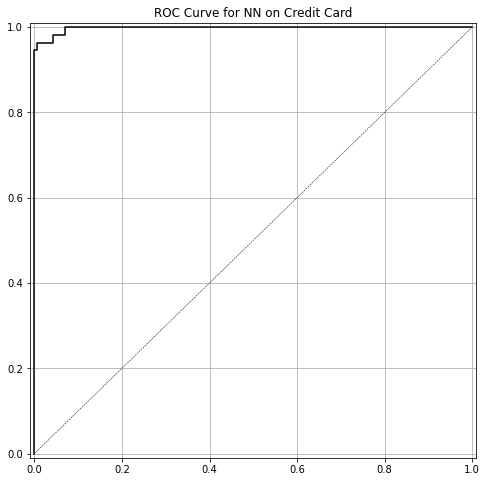

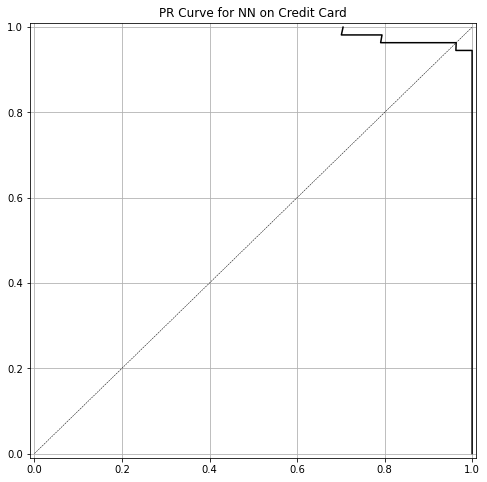

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))
print('average precision score is {:.3f}'.format(average_precision_score(y_test,y_pred_prob_nn_1)))


plot_roc(y_test, y_pred_prob_nn_1, 'NN')
plot_pr(y_test, y_pred_prob_nn_1, 'NN')

In [ ]:
history_dict =  model1history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'binary_crossentropy', 'auc', 'auc_1', 'val_loss', 'val_accuracy', 'val_binary_crossentropy', 'val_auc', 'val_auc_1'])

Definisco e stampo i grafici di loss e accuracy di training e validation

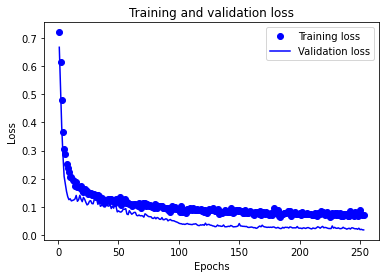

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

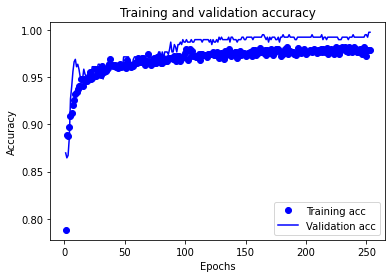

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Esporto modello e history

In [ ]:
model1.save('/content/drive/MyDrive/modello/mio_modello23') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/modello/mio_modello22/assets


In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/modello/trainHistoryDict14', 'wb') as file_pi:
        pickle.dump(model1history.history, file_pi)